# Local Outlier Factor (LOF) Method for Outlier Detection
**Author:** Juan A. Monleón de la Lluvia  
**Date:** 29-08-2023  

## Description
This Jupyter Notebook focuses on identifying outliers in proton-induced experiments data sets. It outlines steps ranging from data preparation to outlier detection using the LOF method. The notebook provides code examples and explanations to facilitate an efficient analysis workflow.

In [79]:
from EXFOR_ProtonReactions_UtilityFunctions import *
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 12)

## Data Import and Cleaning

In [80]:
df = pd.read_csv(r'D:\OneDrive\ETSII\MASTER\TFM\Scripts\exfortables\by_data\group_6.csv')
df = clean_dataframe(df)
df

,E(eV),par,MT,target_A,target_Z,frame_C,frame_L,X4_ID
0,0.0000,4000.0,6001,25,13,0,1,C12430021
1,0.0000,159000.0,6001,25,13,0,1,C12430021
2,0.0000,403000.0,6001,25,13,0,1,C12430021
3,0.0000,434000.0,6001,25,13,0,1,C12430021
4,0.0035,0.0,6021,25,13,0,1,C16890022
...,...,...,...,...,...,...,...,...
5489,0.0000,2.5,6003,92,40,0,1,F07050052
5490,0.0000,0.5,6003,92,40,0,1,F07050052
5491,0.0000,24000.0,6010,92,40,1,0,F07050054
5492,0.0000,83000.0,6010,92,40,1,0,F07050054


In [81]:
# Save the IDs and drop them from the dataframe
X4_ID = df['X4_ID']
df_without_id = df.drop(columns=['X4_ID'])

## Implementation of LOF Method

In [82]:
# Scaling the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_id)

In [83]:
# Applying the LOF algorithm
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers = lof.fit_predict(df_scaled)

In [84]:
# Identifying Outliers
is_outlier = outliers == -1

In [85]:
# Reverting the Scaling
df_descaled = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_without_id.columns)

In [86]:
# Adding the IDs and extracting the outliers
df_descaled['X4_ID'] = X4_ID
df_descaled['is_outlier'] = is_outlier

In [87]:
# Save on outliers_df the dataframe where is_outlier is True and remove that column
outliers_df = df_descaled[df_descaled['is_outlier'] == True].drop('is_outlier', axis=1)
print('Percentage of outliers: {:.2f}%'.format(len(outliers_df)/len(df)*100))
outliers_df

Percentage of outliers: 1.00%


,E(eV),par,MT,target_A,target_Z,frame_C,frame_L,X4_ID
120,3.248,1.5,6003.0,36.0,18.0,0.0,1.000000e+00,C01620082
121,3.282,1.5,6003.0,36.0,18.0,0.0,1.000000e+00,C01620082
123,4.181,2.5,6003.0,36.0,18.0,0.0,1.000000e+00,C01620082
124,4.274,2.5,6003.0,36.0,18.0,0.0,1.000000e+00,C01620082
125,4.586,2.5,6003.0,36.0,18.0,0.0,1.000000e+00,C01620082
...,...,...,...,...,...,...,...,...
5487,0.000,4995000.0,6001.0,92.0,40.0,1.0,1.110223e-16,F07050051
5488,0.000,5935000.0,6001.0,92.0,40.0,1.0,1.110223e-16,F07050051
5491,0.000,24000.0,6010.0,92.0,40.0,1.0,1.110223e-16,F07050054
5492,0.000,83000.0,6010.0,92.0,40.0,1.0,1.110223e-16,F07050054


## Visual Representation and Verification of Outliers

For the visual representations, the whole data set need to be loaded into memory. This is done by using the `read_experiments_from_binary` function, but also could be done by using the `read_experiments_from_txt` function, both available in the `EXFOR_ProtonReactions_UtilityFunctions.py` file.

In [88]:
experiments = read_experiments_from_binary('EXFOR_ProtonReactions_Database.bin')

Grouped outliers according to columns: ['MT', 'target_A', 'target_Z', 'frame_C', 'frame_L']


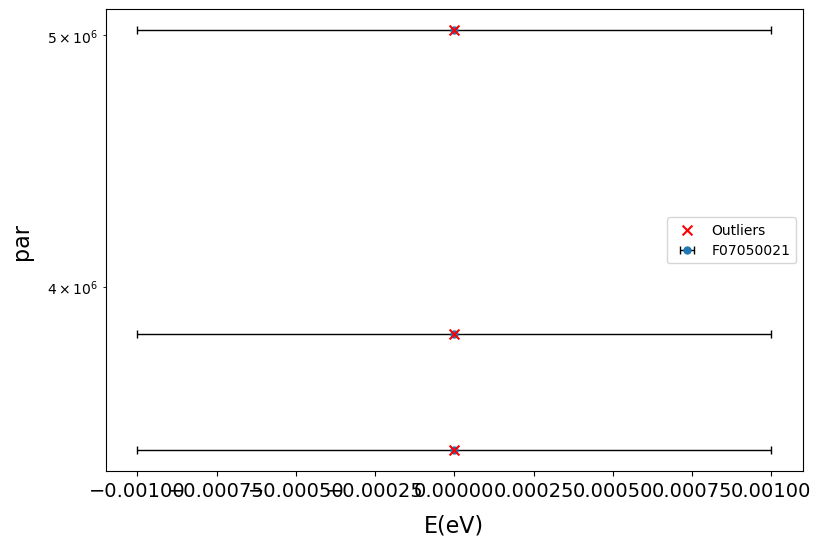

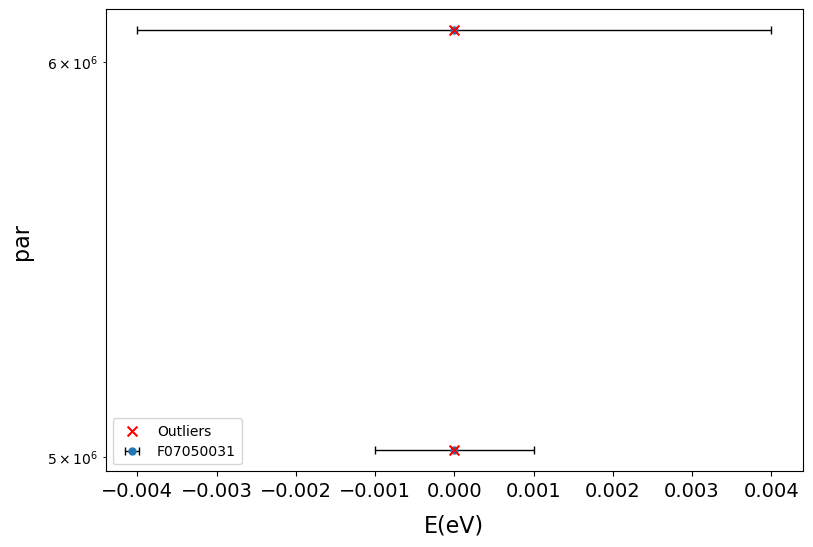

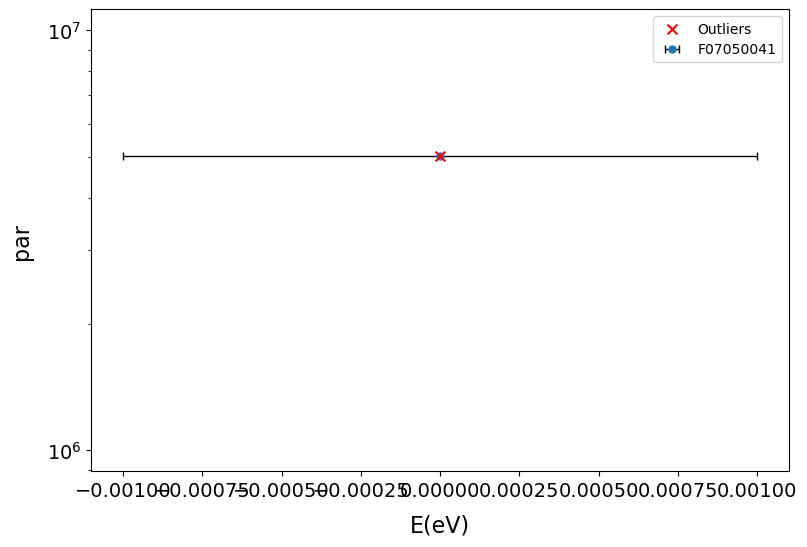

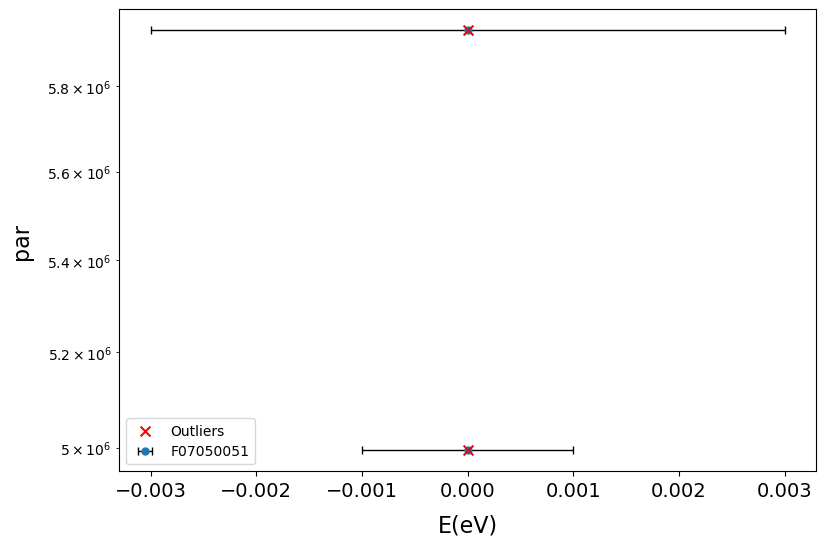

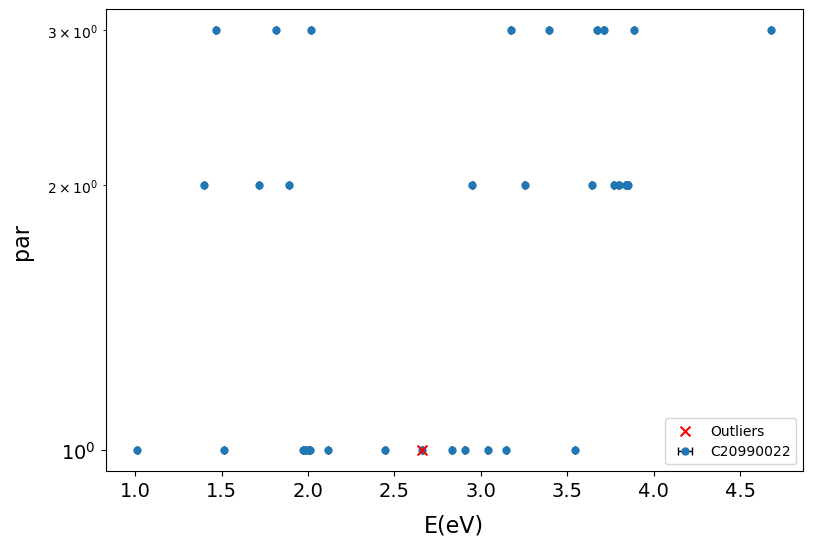

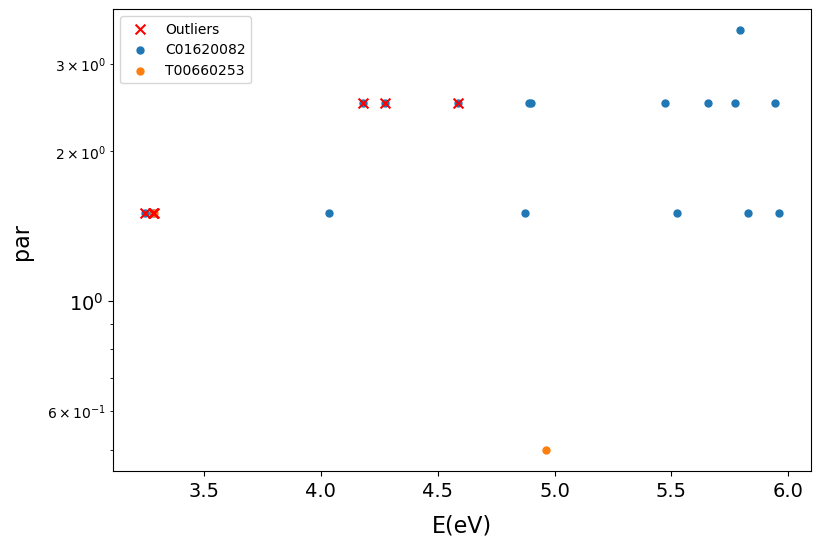

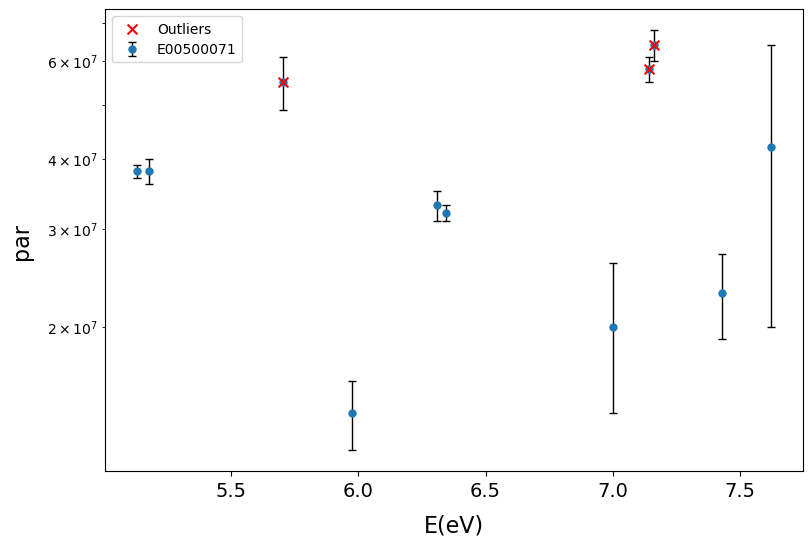

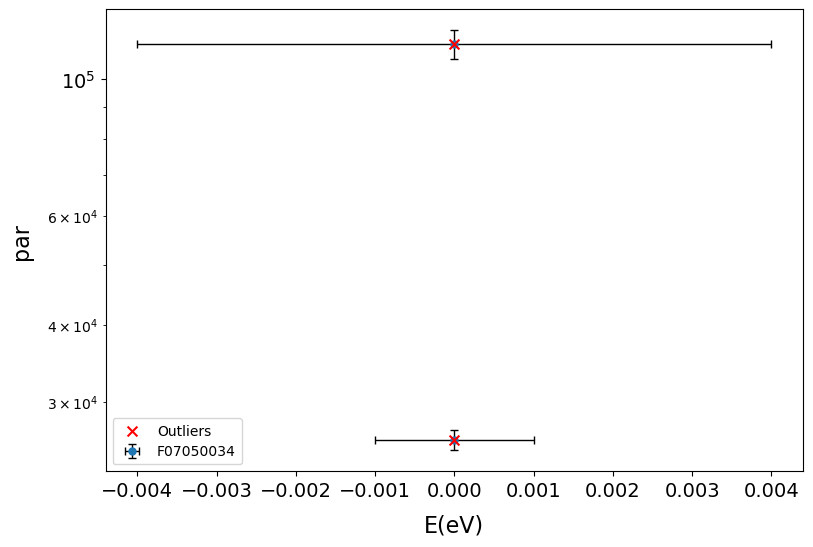

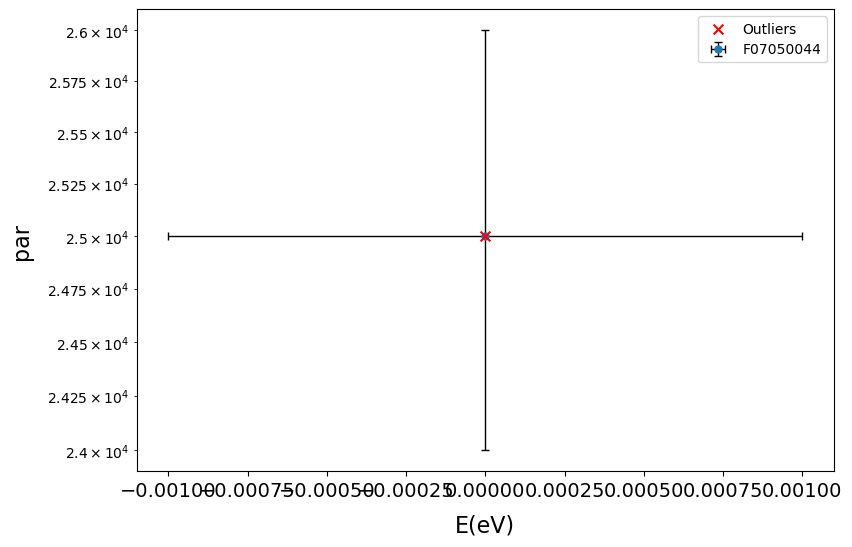

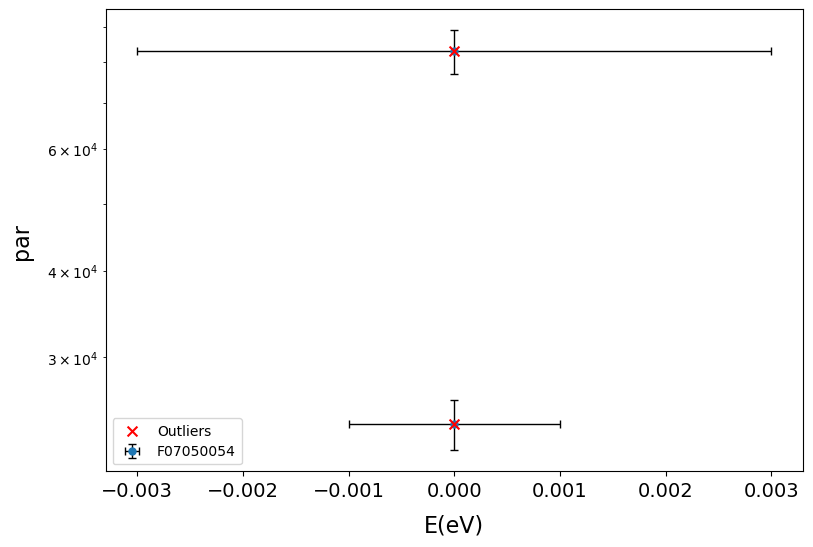

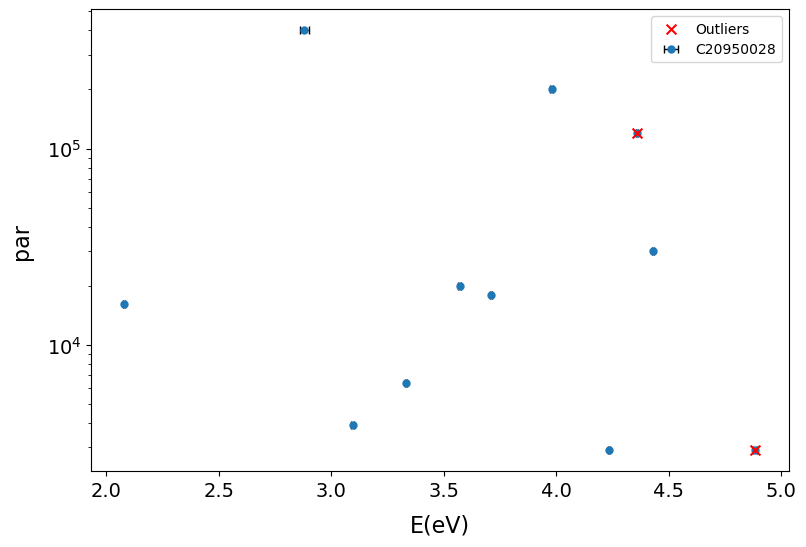

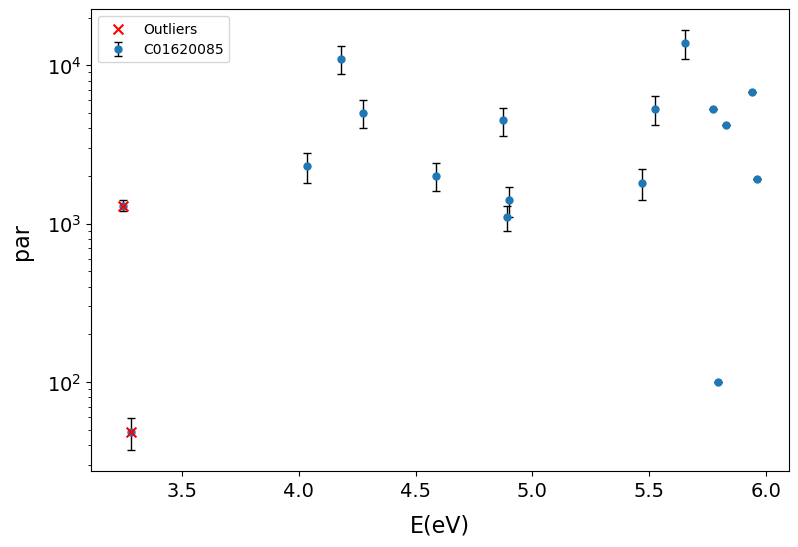

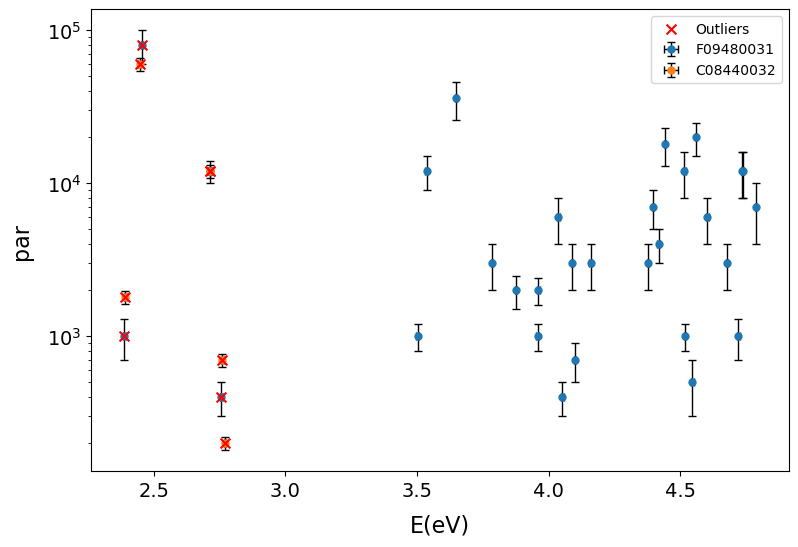

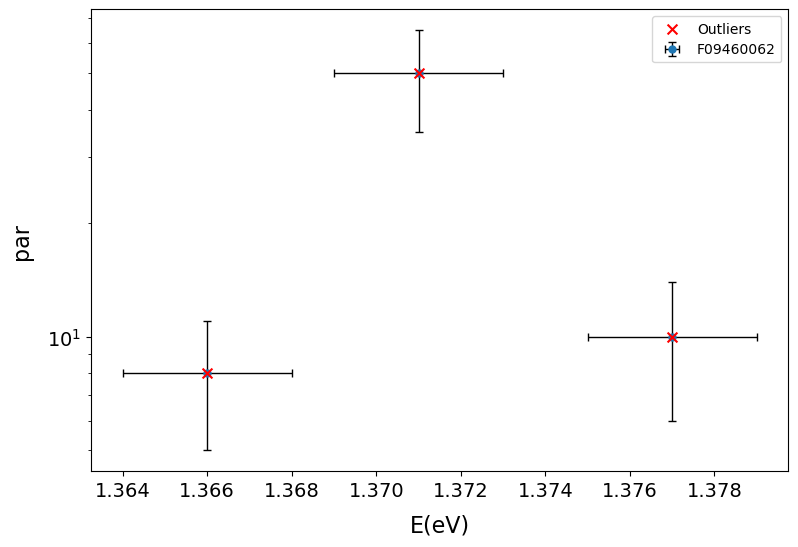

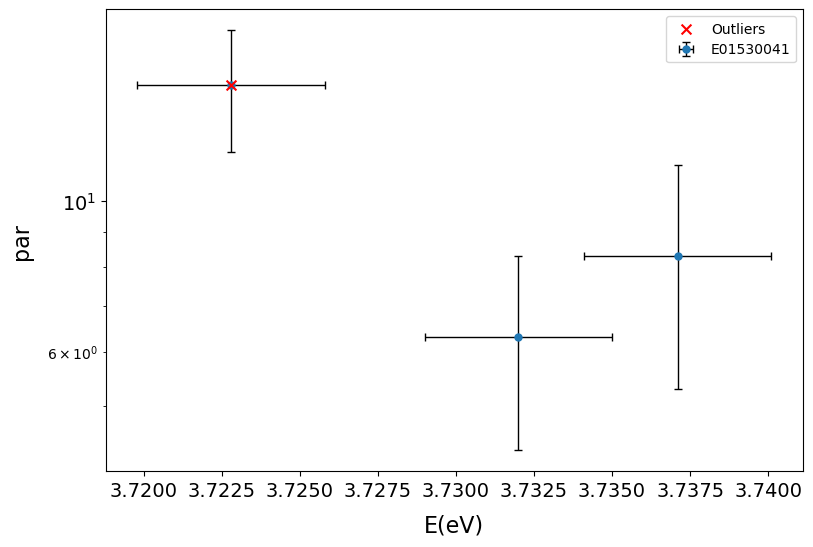

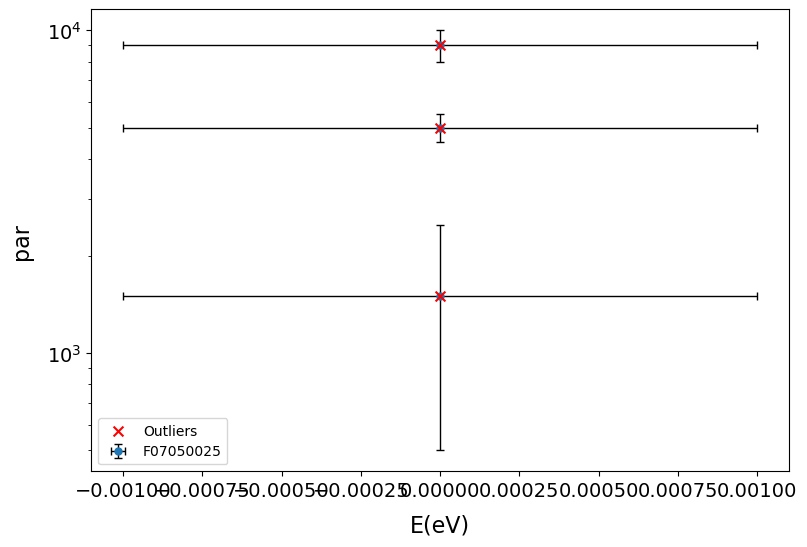

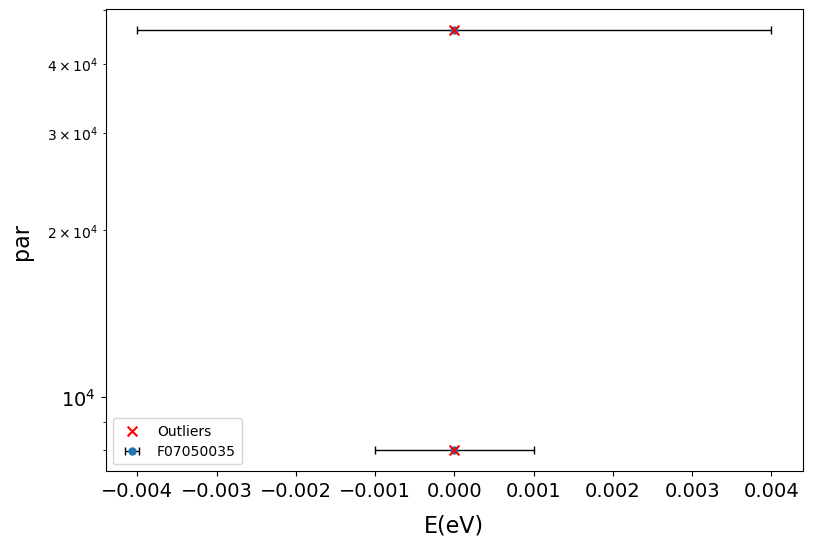

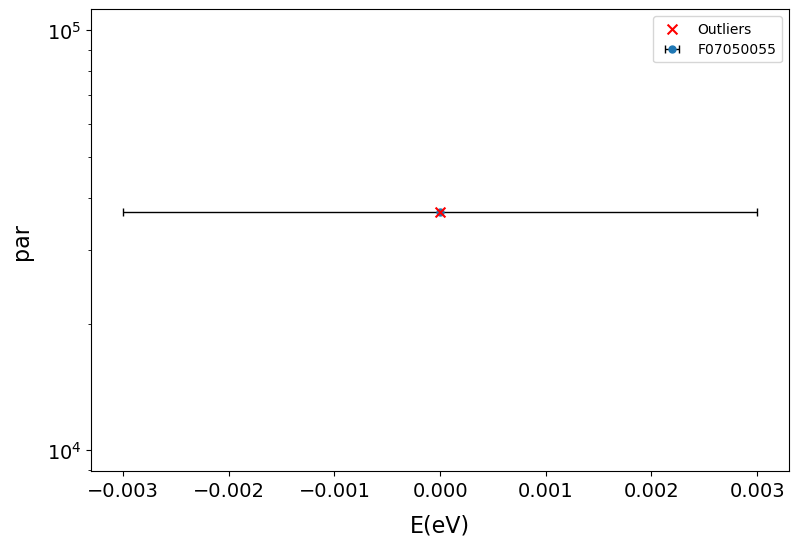

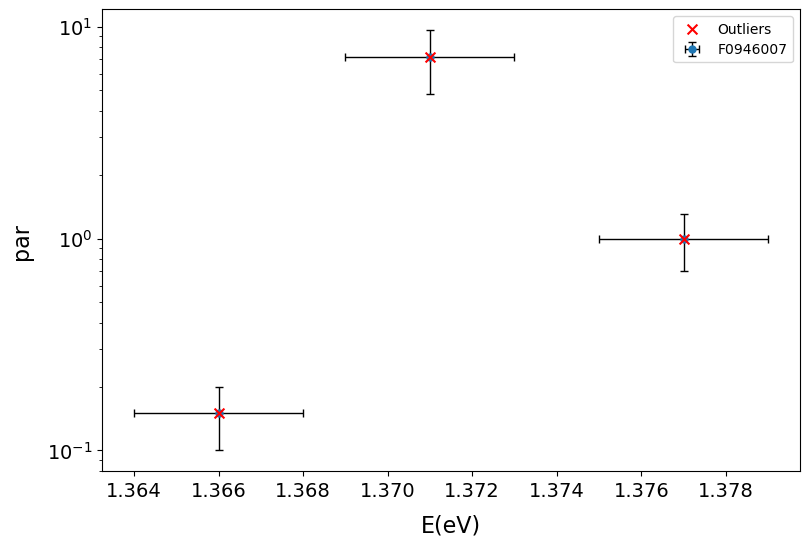

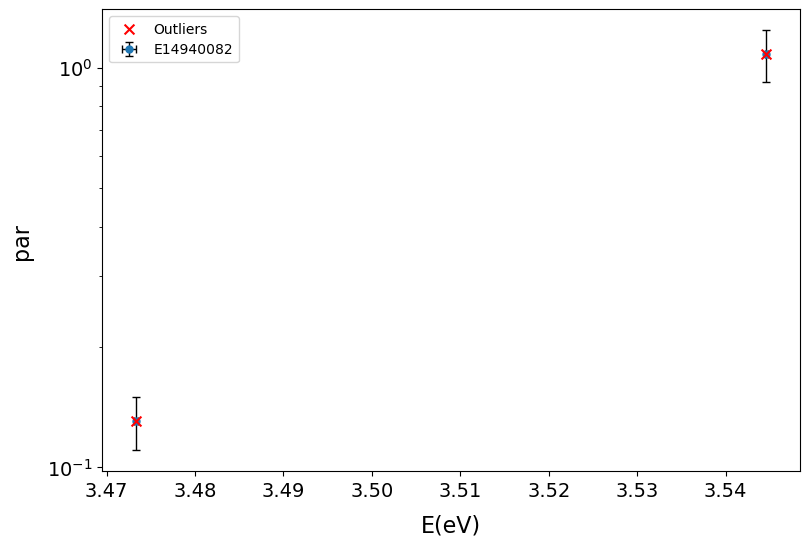

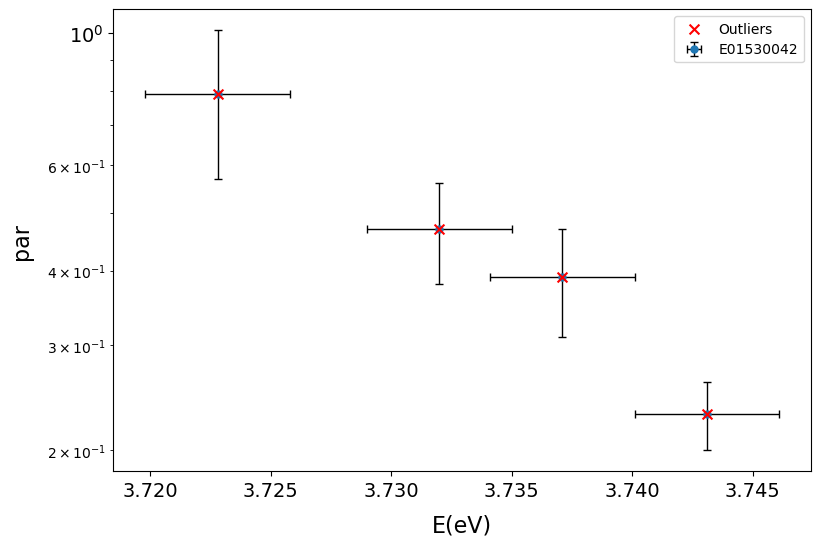

In [89]:
plot_outliers(outliers_df, experiments, ylog=True)